In [226]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [160]:
df = pd.read_csv('Superstore_clean.csv')

In [161]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,Gross Revenue,Profit Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,261.96,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,731.94,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels For Typewriters B...,14.6200,2,0.00,6.8714,4,14.62,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford Cr4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,1741.05,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,27.96,0.1125


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
categorical = df[['Segment', 'Region', 'Category', 'Sub-Category']]
print(f"Unique values:\n{categorical.nunique()}")

Unique values:
Segment          3
Region           4
Category         3
Sub-Category    17
dtype: int64


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Days    0
Gross Revenue    0
Profit Margin    0
dtype: int64


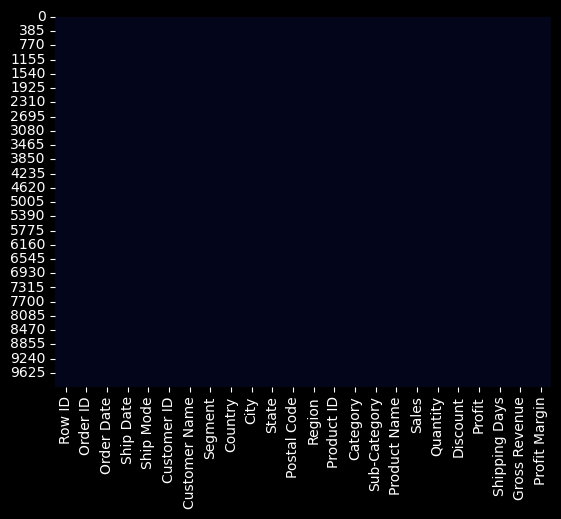

In [163]:
sns.heatmap(df.isna(), cbar = False)
print(df.isna().sum())

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')
df['Order Month'] = df['Order Date'].dt.to_period('M')

In [9]:
plt.style.use('dark_background')

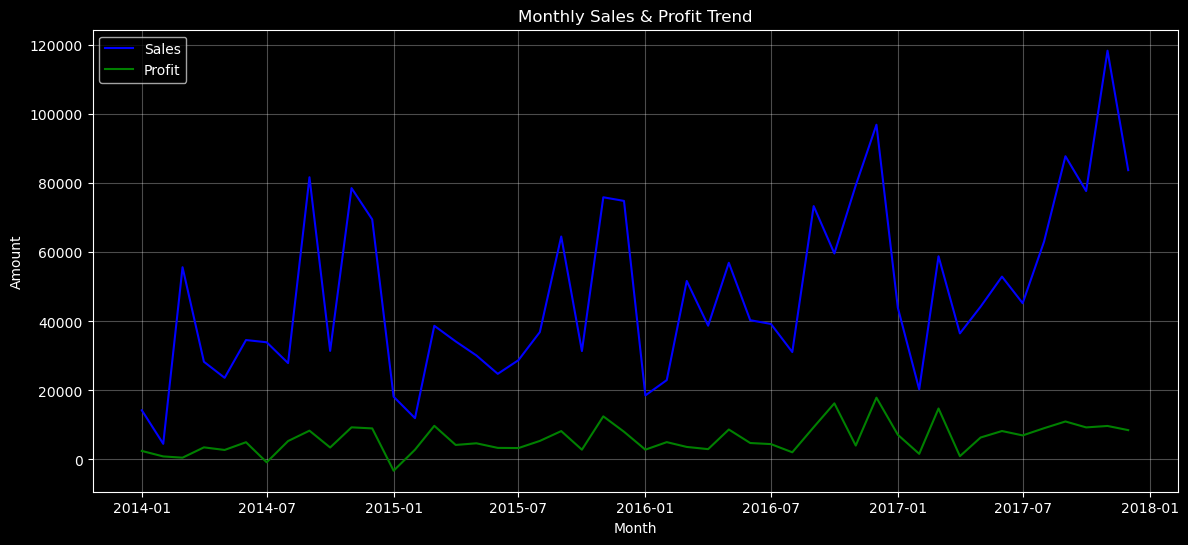

In [98]:
monthly = df.groupby('Order Month')[['Sales', 'Profit']].sum().reset_index()
monthly['Order Month'] = monthly['Order Month'].dt.to_timestamp()
plt.figure(figsize = (14, 6))
sns.lineplot(data = monthly, x = 'Order Month', y = 'Sales', label = 'Sales', color = 'blue')
sns.lineplot(data = monthly, x = 'Order Month', y = 'Profit', label = 'Profit', color = 'green')
plt.title('Monthly Sales & Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

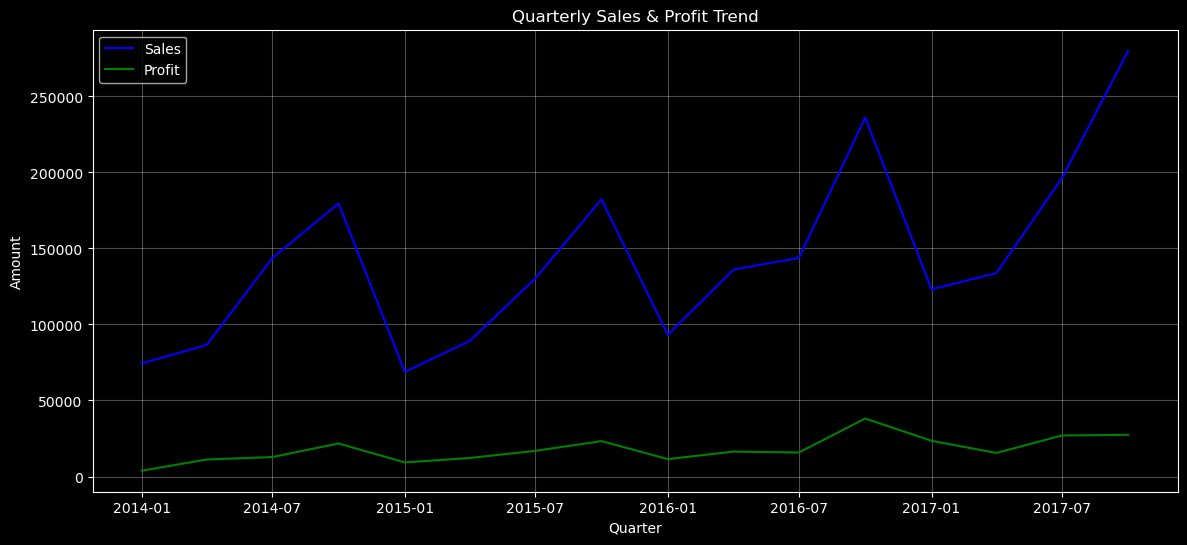

In [99]:
quarterly = df.groupby('Order Quarter')[['Sales', 'Profit']].sum().reset_index()
quarterly['Order Quarter'] = quarterly['Order Quarter'].dt.to_timestamp()
plt.figure(figsize = (14, 6))
sns.lineplot(data = quarterly, x = 'Order Quarter', y = 'Sales', label = 'Sales', color = 'blue')
sns.lineplot(data = quarterly, x = 'Order Quarter', y = 'Profit', label = 'Profit', color = 'green')
plt.title('Quarterly Sales & Profit Trend')
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

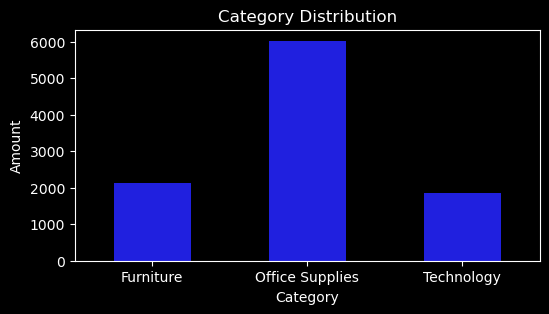

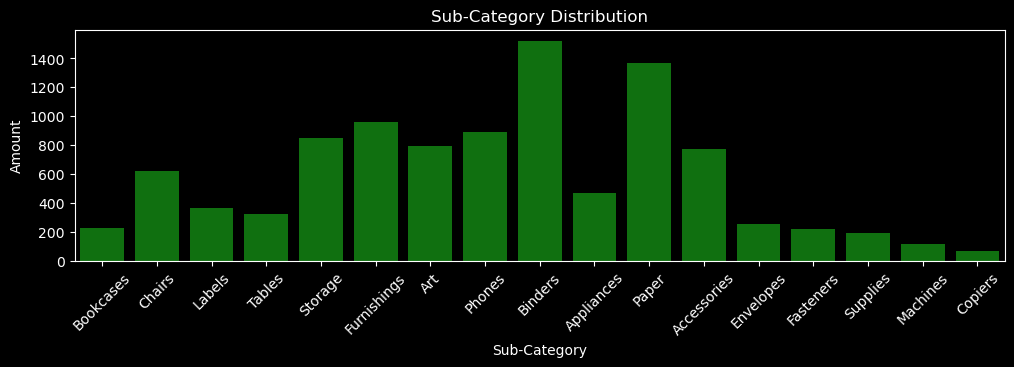

In [101]:
plt.figure(figsize = (6, 3))
sns.countplot(data = df, x = 'Category', color = 'blue', width = 0.5)
plt.title('Category Distribution')
plt.ylabel('Amount')
plt.show()
plt.figure(figsize = (12, 3))
sns.countplot(data = df, x = 'Sub-Category', color = 'green')
plt.title('Sub-Category Distribution')
plt.ylabel('Amount')
plt.xticks(rotation = 45)
plt.show()

C:\Users\nanda\AppData\Local\Temp\ipykernel_16204\4232148943.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data = df, x = 'Segment', color = 'blue', width = 0.5, hue = 'Category')


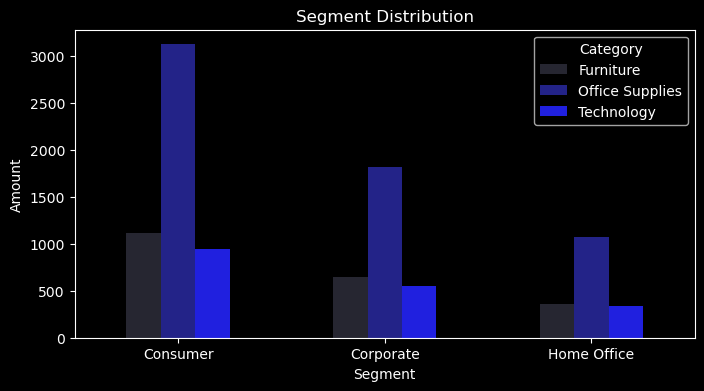

C:\Users\nanda\AppData\Local\Temp\ipykernel_16204\4232148943.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(data = df, x = 'Region', color = 'green', width = 0.5, hue = 'Category')


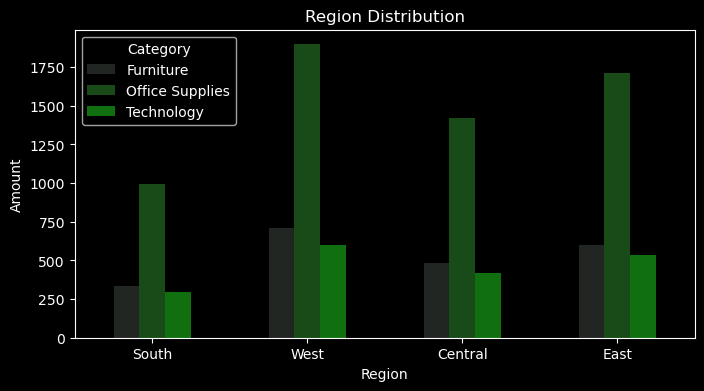

In [102]:
plt.figure(figsize = (8, 4))
sns.countplot(data = df, x = 'Segment', color = 'blue', width = 0.5, hue = 'Category')
plt.title('Segment Distribution')
plt.ylabel('Amount')
plt.show()
plt.figure(figsize = (8, 4))
sns.countplot(data = df, x = 'Region', color = 'green', width = 0.5, hue = 'Category')
plt.title('Region Distribution')
plt.ylabel('Amount')
plt.show()

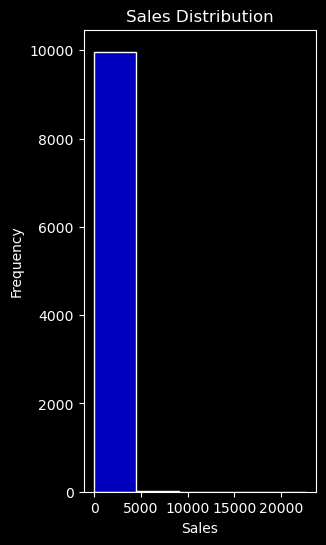

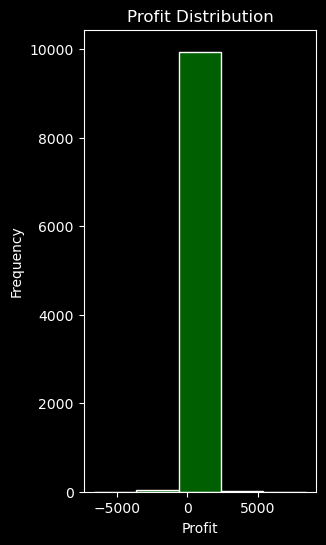

In [103]:
plt.figure(figsize = (3, 6))
sns.histplot(data = df, x = 'Sales', bins = 5, color = 'blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize = (3, 6))
sns.histplot(data = df, x = 'Profit', bins = 5, color = 'green')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

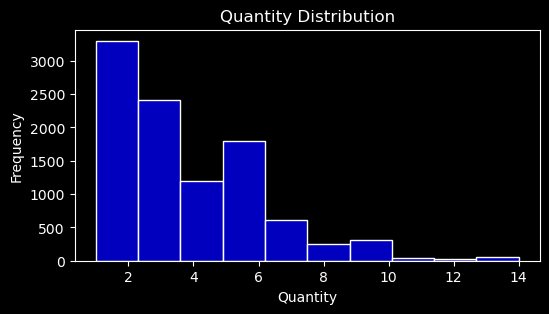

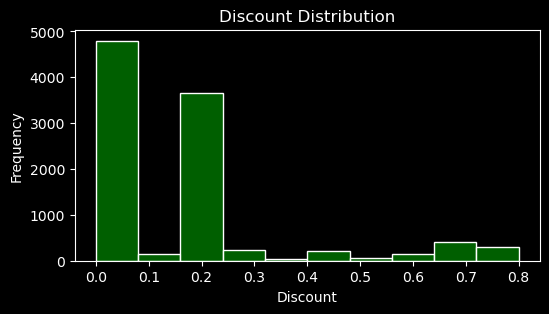

In [104]:
plt.figure(figsize = (6, 3))
sns.histplot(data = df, x = 'Quantity', bins = 10, color = 'blue')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize = (6, 3))
sns.histplot(data = df, x = 'Discount', bins = 10, color = 'green')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

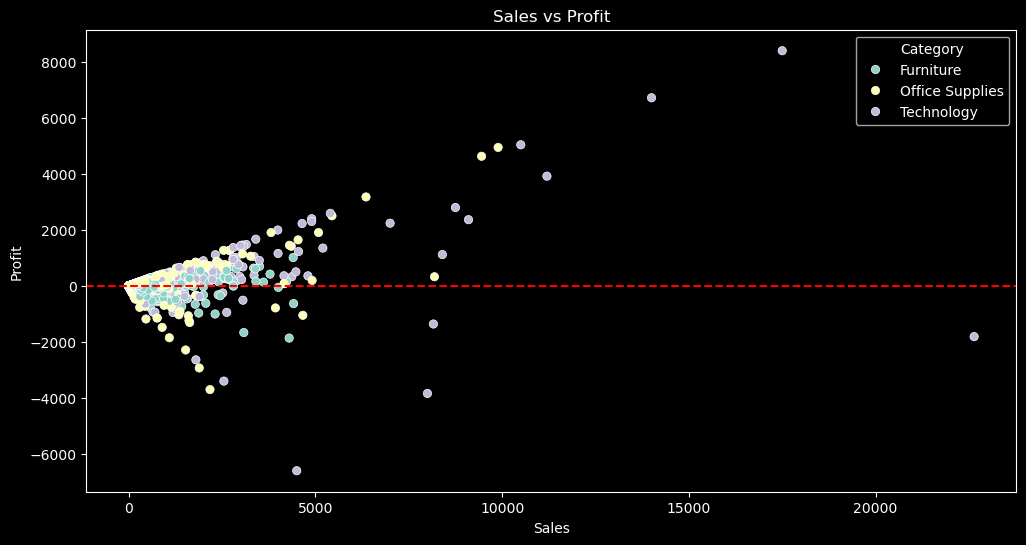

In [54]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df, x = 'Sales', y = 'Profit', marker = 'o', hue = 'Category')
plt.title('Sales vs Profit')
plt.axhline(0, color = 'red', linestyle = '--')
plt.show()

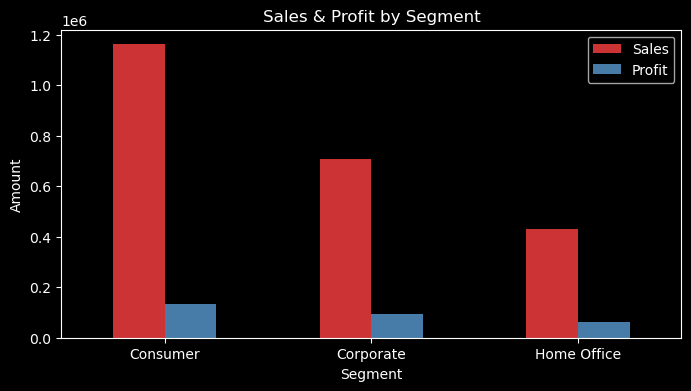

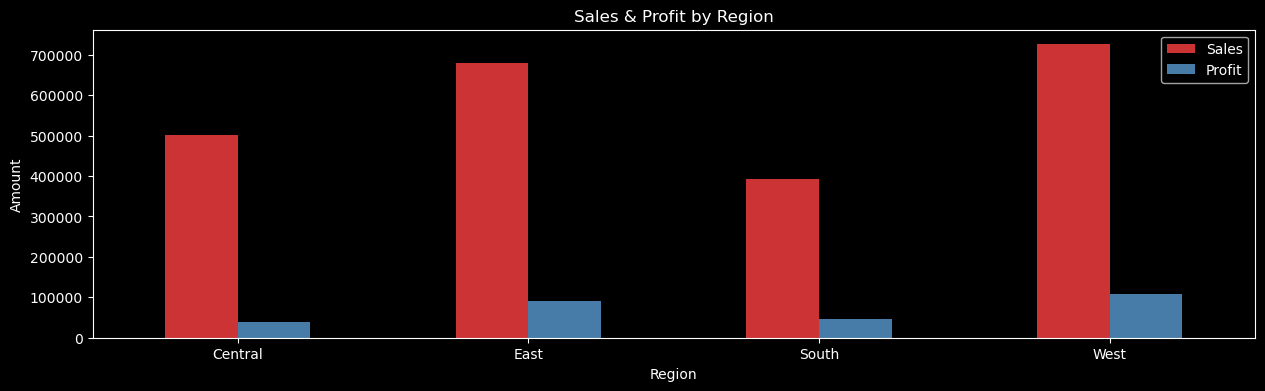

In [139]:
segmentsalesprofit = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
segmentsalesprofitmelt = segmentsalesprofit.melt(id_vars = 'Segment',
                                        value_vars = ['Sales', 'Profit'],
                                        var_name = 'Metric',
                                        value_name = 'Amount')
regionsalesprofit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
regionsalesprofitmelt = regionsalesprofit.melt(id_vars = 'Region',
                                              value_vars = ['Sales', 'Profit'],
                                              var_name = 'Metric2',
                                              value_name = 'Amount')
plt.figure(figsize = (8, 4))
sns.barplot(data = segmentsalesprofitmelt, x = 'Segment', y = 'Amount', hue = 'Metric', palette = 'Set1', width = 0.5)
plt.title('Sales & Profit by Segment')
plt.ylabel('Amount')
plt.xlabel('Segment')
plt.legend()
plt.show()
plt.figure(figsize = (15, 4))
sns.barplot(data = regionsalesprofitmelt, x = 'Region', y = 'Amount', hue = 'Metric2', palette = 'Set1', width = 0.5)
plt.title('Sales & Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()
plt.show()

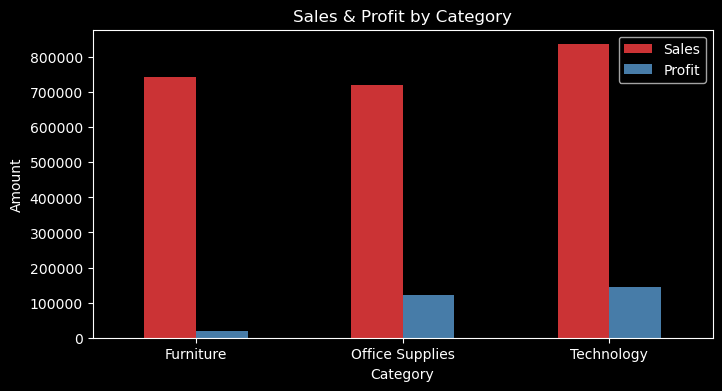

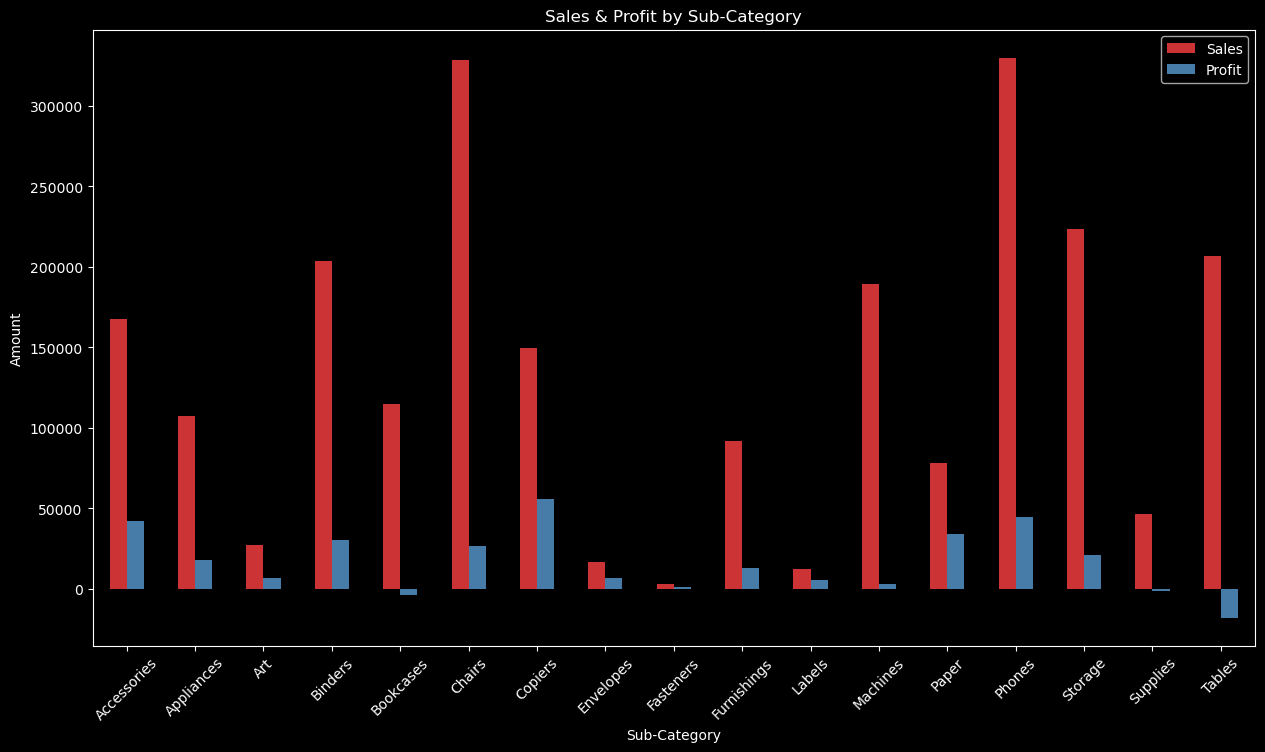

In [152]:
catsalesprofit =  df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
catsalesprofitmelt = catsalesprofit.melt(id_vars = 'Category',
                                        value_vars = ['Sales', 'Profit'],
                                        var_name = 'Metric3',
                                        value_name = 'Amount')
subcatsalesprofit = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
subcatsalesprofitmelt = subcatsalesprofit.melt(id_vars = 'Sub-Category',
                                              value_vars = ['Sales', 'Profit'],
                                              var_name = 'Metric4',
                                              value_name = 'Amount')
plt.figure(figsize = (8, 4))
sns.barplot(data = catsalesprofitmelt, x = 'Category', y = 'Amount', hue = 'Metric3', palette = 'Set1', width = 0.5)
plt.title('Sales & Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend()
plt.show()
plt.figure(figsize = (15, 8))
sns.barplot(data = subcatsalesprofitmelt, x = 'Sub-Category', y = 'Amount', hue = 'Metric4', palette = 'Set1', width = 0.5)
plt.title('Sales & Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

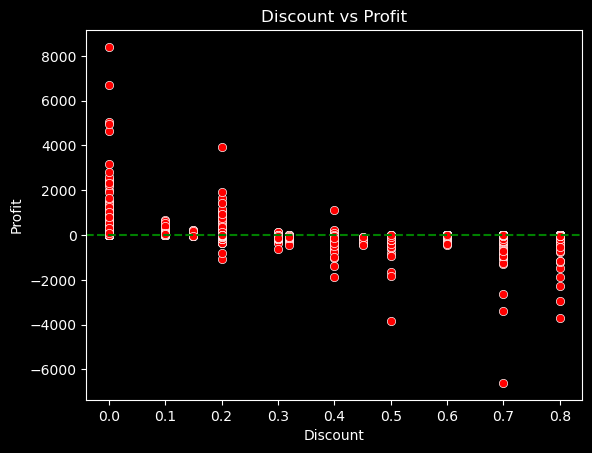

In [159]:
sns.scatterplot(data = df, x = 'Discount', y = 'Profit', color = 'red')
plt.title('Discount vs Profit')
plt.axhline(0, color = 'green', linestyle = '--')
plt.show()

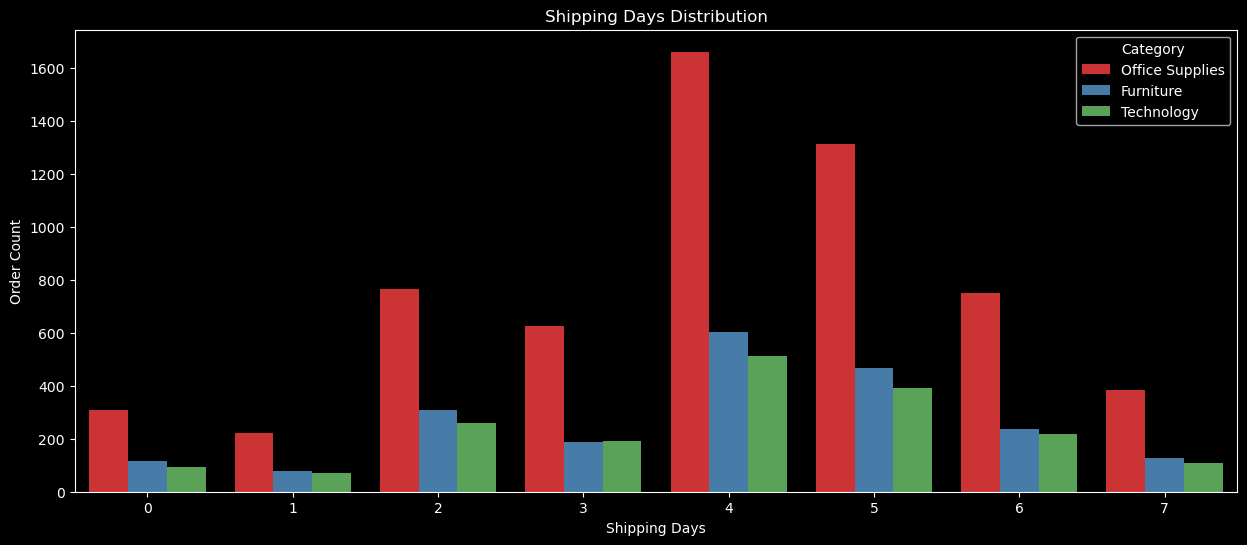

In [214]:
plt.figure(figsize = (15, 6))
sns.countplot(data = df, x = 'Shipping Days', palette = 'Set1', hue = 'Category')
plt.title('Shipping Days Distribution')
plt.ylabel('Order Count')
plt.show()

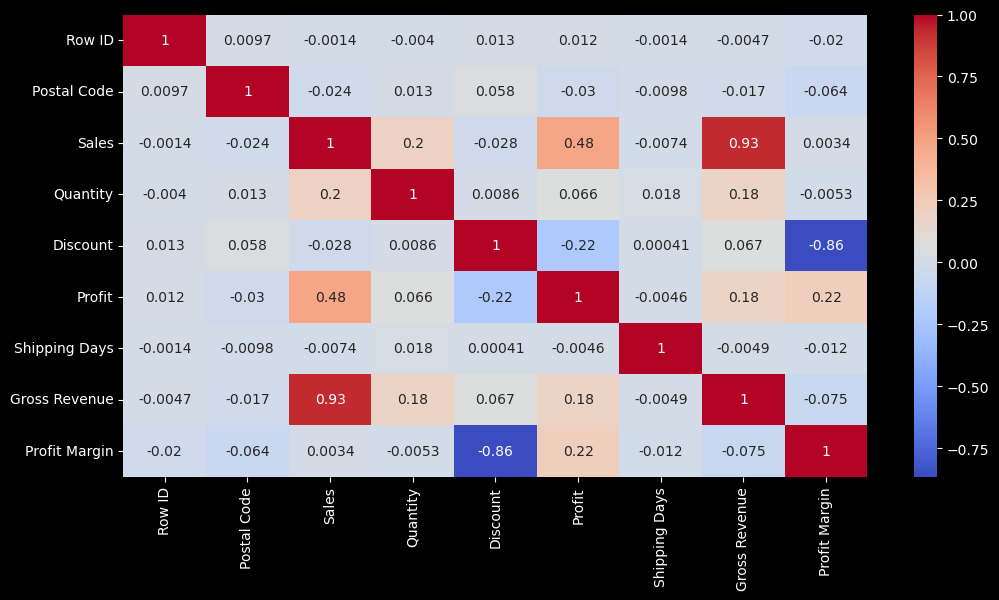

In [220]:
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize = (12, 6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

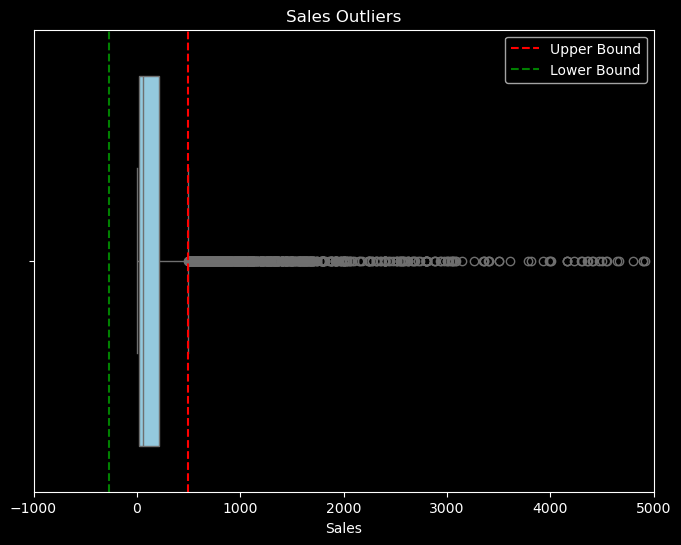

In [249]:
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lb = Q1_sales - 1.5 * IQR_sales
ub = Q3_sales + 1.5 * IQR_sales
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'Sales', color = 'skyblue')
plt.axvline(ub, color = 'red', linestyle = '--', label = 'Upper Bound')
plt.axvline(lb, color = 'green', linestyle = '--', label = 'Lower Bound')
plt.title('Sales Outliers')
plt.xlim(-1000, 5000)
plt.legend()
plt.show()

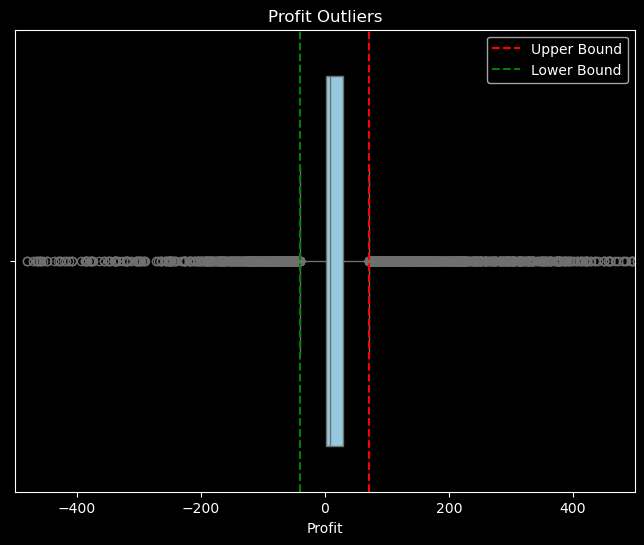

In [250]:
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit
lb = Q1_profit - 1.5 * IQR_profit
ub = Q3_profit + 1.5 * IQR_profit
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'Profit', color = 'skyblue')
plt.axvline(ub, color = 'red', linestyle = '--', label = 'Upper Bound')
plt.axvline(lb, color = 'green', linestyle = '--', label = 'Lower Bound')
plt.title('Profit Outliers')
plt.xlim(-500, 500)
plt.legend()
plt.show()

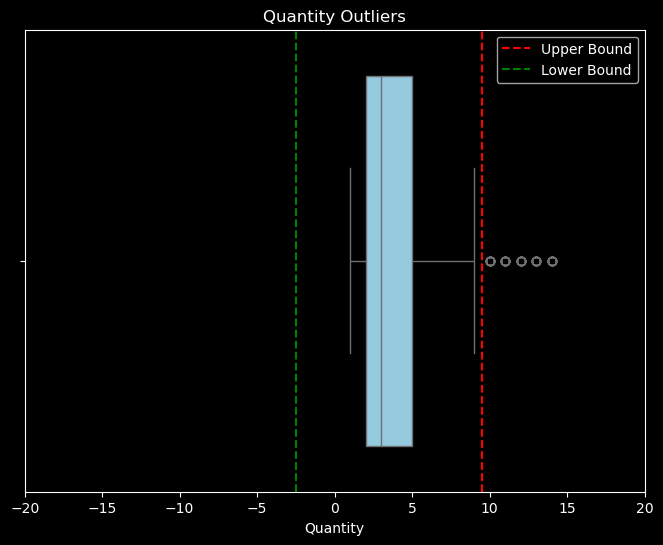

In [251]:
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lb = Q1_quantity - 1.5 * IQR_quantity
ub = Q3_quantity + 1.5 * IQR_quantity
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'Quantity', color = 'skyblue')
plt.axvline(ub, color = 'red', linestyle = '--', label = 'Upper Bound')
plt.axvline(lb, color = 'green', linestyle = '--', label = 'Lower Bound')
plt.title('Quantity Outliers')
plt.xlim(-20, 20)
plt.legend()
plt.show()

In [ ]:
# Key Insights from EDA
# Sales vs Profit:
# - Sales are high across categories, but Profitability is inconsistent.
# - Some orders with large sales actually lead to losses, mostly due to high discounts.

# Category & Sub-Category Performance:
# - Technology is the most profitable category.
# - Furniture shows good sales but very low or negative profit margins.
# - Within sub-categories, Copiers and Phones are highly profitable, while Tables often run at a loss.

# Regional & Segment Trends:
# - West and East regions contribute the highest sales.
# - Central region struggles with profitability.
# - Consumer segment dominates sales volume, while Corporate and Home Office are steadier in profit contribution.

# Discount Impact:
# - Profit drops sharply when discounts exceed 30–40%.
# - High-discount sales often result in negative profit, especially in Furniture.

# Shipping Insights:
# - Most orders are shipped within 3–5 days.
# - Same Day shipping mode is used less frequently but usually for high-value orders.
# - No cases found where shipping date is before order date (data consistency check passed).

# Time Trends:
# - Sales show a steady increase year-over-year.
# - Seasonal peaks observed during November–December, suggesting holiday sales boost.

# Customer Behavior:
# - A small percentage of customers contribute to a large portion of sales (Pareto principle: 80/20 effect).
# - Top 10 customers significantly impact revenue, but some are not profitable due to high discounts.